In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore', FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [3]:
# import csv to df
# data_read =pd.read_csv("../Resources/fraudTrain.csv")
data_read =pd.read_csv("../resources/fraudTrain.csv")
data_read.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Up Sampling minority class

In [4]:
from sklearn.utils import resample

In [5]:
#separate majority and minority classes
df_majority = data_read[data_read.is_fraud==0]
df_minority = data_read[data_read.is_fraud==1]
print(df_majority.size)
print(df_minority.size)
data_read.is_fraud.value_counts()

29650887
172638


0    1289169
1       7506
Name: is_fraud, dtype: int64

In [6]:
# Upsample minority class
# nsamples = df_majority.is_fraud.count()

nsamples = round(df_majority.is_fraud.count()/2).astype(int)

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=nsamples,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled.is_fraud.value_counts()

1    644584
Name: is_fraud, dtype: int64

In [7]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69495,69495,2019-02-10 23:27:41,4669558618943766,fraud_Boyer-Reichert,shopping_net,980.79,Daniel,Hernandez,M,7340 Mcgrath Islands,...,41.1039,-72.3674,4299,Broadcast presenter,1968-10-26,e1929fa20733c22938029276c11d1d16,1328916461,41.924326,-72.787852,1
1133864,1133864,2020-04-17 13:51:50,30263540414123,"fraud_Streich, Dietrich and Barton",shopping_net,974.97,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,e26550509ff8bae768d25965f4459059,1366206710,37.589782,-111.710477,1
815199,815199,2019-12-07 23:56:59,4430881574719618,fraud_Schumm PLC,shopping_net,931.28,Alicia,Morales,F,4456 Dunn Roads,...,39.3199,-106.6596,61,Public relations account executive,1939-11-04,2fc589f78dd34f3c5462d53cfde79ff2,1354924619,38.511562,-106.994630,1
273012,273012,2019-05-15 02:28:13,3575540972310993,fraud_Luettgen PLC,gas_transport,6.81,Rachel,Villarreal,F,250 Carrie Throughway,...,34.3396,-89.5736,4198,Curator,2001-06-22,f489de72a73785fc366d7e81d5c055a3,1337048893,34.872931,-89.679913,1


In [8]:
data_train = df_upsampled
data_train['dob']= pd.to_datetime(data_train['dob'])
data_train['dob']

from datetime import datetime
today = datetime.today()
data_train['age'] = round(data_train['dob'].apply(lambda x: (today - x).days//365.25),0)


In [9]:
data_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [10]:
data_train = data_train[["category", "cc_num",
                "amt",
                "lat","long",
                "job",
                "age",
                "trans_num",
                "unix_time",
                "merch_lat","merch_long"]]
data_train.head()

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long
0,misc_net,2703186189652095,4.97,36.0788,-81.1781,"Psychologist, counselling",32.0,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315
1,grocery_pos,630423337322,107.23,48.8878,-118.2105,Special educational needs teacher,42.0,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462
2,entertainment,38859492057661,220.11,42.1808,-112.2620,Nature conservation officer,58.0,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481
3,gas_transport,3534093764340240,45.00,46.2306,-112.1138,Patent attorney,53.0,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071
4,misc_pos,375534208663984,41.96,38.4207,-79.4629,Dance movement psychotherapist,34.0,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459


In [11]:
data_train['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
get_transnum = data_train['trans_num']
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(get_transnum)
encoded_transnum = label_encoder.transform(get_transnum)
data_train['trans_num'] = encoded_transnum

In [13]:
# Step 1: Label-encode data set
get_category = data_train['category']
label_encoder = LabelEncoder()
label_encoder.fit(get_category)
encoded_category = label_encoder.transform(get_category)
data_train['category'] = encoded_category

In [14]:
# Step 1: Label-encode data set
get_job = data_train['job']
label_encoder = LabelEncoder()
label_encoder.fit(get_job)
encoded_job = label_encoder.transform(get_job)
data_train['job'] = encoded_job

In [15]:
# Define the features
selected_features = data_train

# sets y to is_fraud
# target = data_read["is_fraud"].values.reshape(-1, 1)
target = df_upsampled["is_fraud"]

# Split and Scale the Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)
X_train.head()

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long
194040,12,4018105808392773675,2.04,40.2367,-74.0067,12,85.0,1246622,1334029625,39.320423,-73.289080
1206474,12,30143535920989,692.59,39.8016,-75.3478,12,40.0,812180,1368945588,40.417364,-74.943305
715234,11,4990494243023,1152.77,39.6967,-78.8031,11,59.0,50899,1351814060,40.536552,-79.215148
227296,11,375248307838179,8.71,38.8564,-80.1580,11,53.0,1000841,1335320188,38.196152,-79.577833
15005,12,3566094707272327,144.24,34.3795,-118.5230,12,49.0,905824,1326119458,35.209637,-117.560680


In [17]:
# Scale your data
from sklearn.preprocessing import StandardScaler

# Create a minmaxscalar model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier


In [49]:
train_scores =[]
test_scores = []

for k in range( 1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_score = knn.score(X_train_scaled,y_train)
    test_score = knn.score(X_test_scaled,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
#     train_y.values.ravel()
    print(f"k: {k}, Train/Test Score : {train_score: .3f}/{test_score:.3f}")

k: 1, Train/Test Score :  1.000/0.999
k: 3, Train/Test Score :  0.999/0.997
k: 5, Train/Test Score :  0.997/0.996
k: 7, Train/Test Score :  0.996/0.995
k: 9, Train/Test Score :  0.995/0.994
k: 11, Train/Test Score :  0.994/0.993
k: 13, Train/Test Score :  0.993/0.992
k: 15, Train/Test Score :  0.992/0.991
k: 17, Train/Test Score :  0.991/0.990
k: 19, Train/Test Score :  0.990/0.989


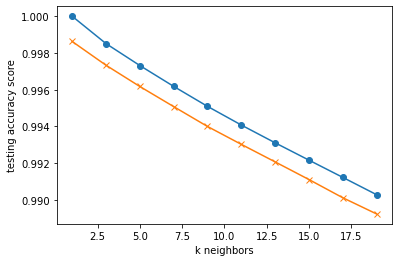

In [50]:
plt.plot(range(1,20,2) , train_scores, marker='o')
plt.plot(range(1,20,2), test_scores, marker= 'x')
plt.xlabel("k neighbors")
plt.ylabel("testing accuracy score")
plt.show()

In [51]:
#Provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled,y_train)
print('k=9 Test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Accuracy: 0.994


In [ ]:
knn_predictions = knn_model.predict(X_test_scaled)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Confusion Matrix for Logistic Regression Model
knn_predictions = knn_predictions.predict(X_test_scaled)
cf_matrix = metrics.confusion_matrix(knn_predictions, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, knn_predictions).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [ ]:
## Plot the confusion matrix chart
class_names =["Genuine","Fraud"]
plot_confusion_matrix(knn_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for K Nearest Neighbors Model")
plt.show()

## Classification Report

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                           target_names=['Not Fraud','Fraud']))